<a href="https://colab.research.google.com/github/anmuhina/VkCloud/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('AirQualityUCI.csv', delimiter=';')
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')
df['T'] = df['T'].str.replace(',', '.')
df['T'] = pd.to_numeric(df['T'], errors='coerce')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.')
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'], errors='coerce')
df['RH'] = df['RH'].str.replace(',', '.')
df['RH'] = pd.to_numeric(df['RH'], errors='coerce')
df['AH'] = df['AH'].str.replace(',', '.')
df['AH'] = pd.to_numeric(df['AH'], errors='coerce')
print(df)

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

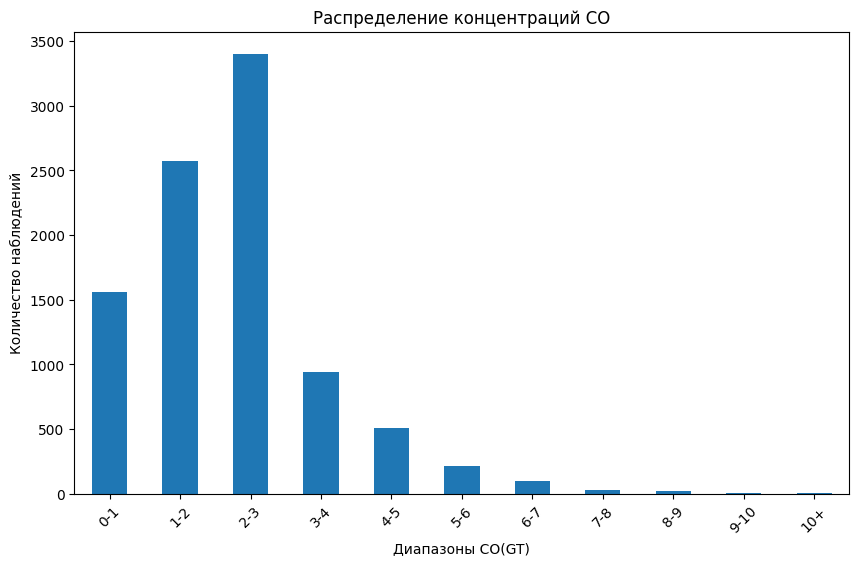

In [5]:
'''1. Найдите количество наблюдений для каждого диапазона значений целевой переменной
"CO(GT)" (уровень концентрации оксида углерода). Разбейте значения CO(GT) на несколько
интервалов (например, с помощью pd.cut или pd.qcut) и примените метод plot к полученным
данным, чтобы построить столбчатую диаграмму, показывающую распределение концентраций
CO.'''
#Заменим значения -200 на среднее
mean_value = df['CO(GT)'][df['CO(GT)'] != -200].mean()
df.loc[df['CO(GT)'] == -200, 'CO(GT)'] = mean_value

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10+']
df['CO_bins'] = pd.cut(df['CO(GT)'], bins=bins, labels=labels, right=False)
co_counts = df['CO_bins'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
co_counts.plot(kind='bar')
plt.title('Распределение концентраций CO')
plt.xlabel('Диапазоны CO(GT)')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.show()

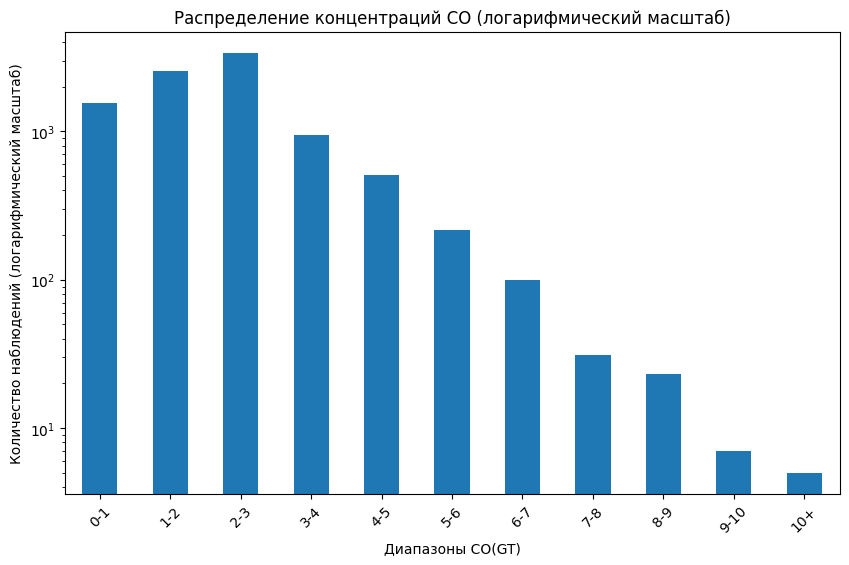

In [6]:
'''2. Постройте такую же столбчатую диаграмму, как в задаче 1, но используйте логарифмический
масштаб для оси Y (количества наблюдений). Это поможет лучше визуализировать распределение,
если есть очень большие различия в частоте встречаемости разных диапазонов концентраций CO.'''
plt.figure(figsize=(10, 6))
co_counts.plot(kind='bar', logy = True)
plt.title('Распределение концентраций CO (логарифмический масштаб)')
plt.xlabel('Диапазоны CO(GT)')
plt.ylabel('Количество наблюдений (логарифмический масштаб)')
plt.xticks(rotation=45)
plt.show()

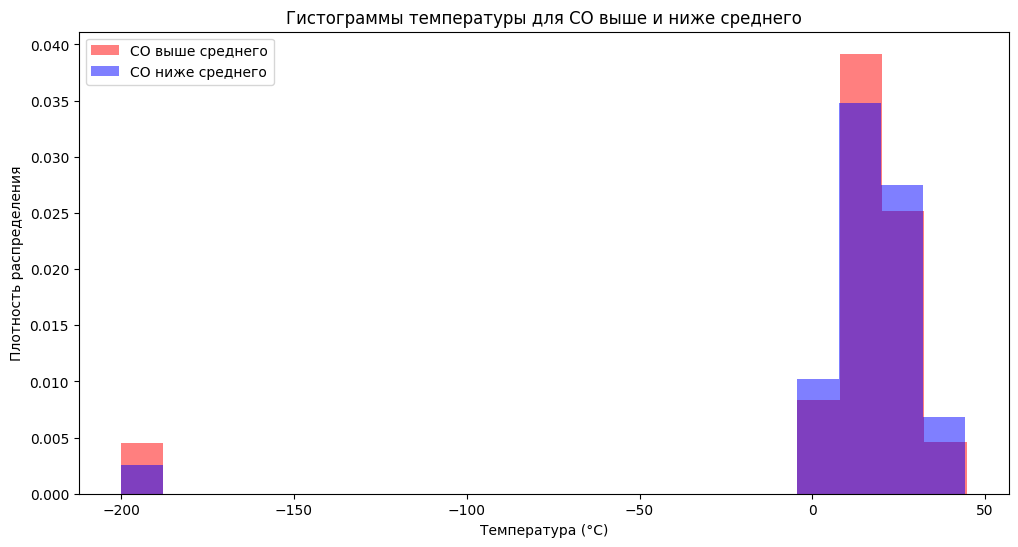

In [7]:
'''3. Постройте две гистограммы по значениям признака "T" (температура) – одну для наблюдений,
где уровень концентрации оксида углерода (CO(GT)) выше среднего, и другую – где он ниже
среднего.
4. В задаче 3 подберите значение аргумента density=True в функции hist так, чтобы по вертикали
графика была расположена не частота, а плотность распределения. Число бинов должно равняться
20 для обеих гистограмм, а коэффициент alpha равным 0.5, чтобы гистограммы были
полупрозрачными и не загораживали друг друга.
5. Создайте легенду с двумя значениями: "CO выше среднего" и "CO ниже среднего". Гистограмма для "CO выше среднего" должна быть красного цвета, а для "CO ниже среднего" - синего.
Название горизонтальной оси – "Температура (°C)".'''

#Аргумент density=True в функции hist() нормализует гистограмму, чтобы общая площадь столбцов равнялась единице.

mean_co = df['CO(GT)'].mean()
above_mean = df[df['CO(GT)'] > mean_co]
below_mean = df[df['CO(GT)'] <= mean_co]
plt.figure(figsize=(12, 6))
plt.hist(above_mean['T'], bins=20, alpha=0.5, color='red', label='CO выше среднего', density=True)
plt.hist(below_mean['T'], bins=20, alpha=0.5, color='blue', label='CO ниже среднего', density=True)
plt.xlabel('Температура (°C)')
plt.ylabel('Плотность распределения')
plt.legend()
plt.title('Гистограммы температуры для CO выше и ниже среднего')
plt.show()

<ipython-input-9-acd32272ad4b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['C6H6(GT)'].groupby(df['Time_of_Day']).hist(alpha=0.5, bins=20)


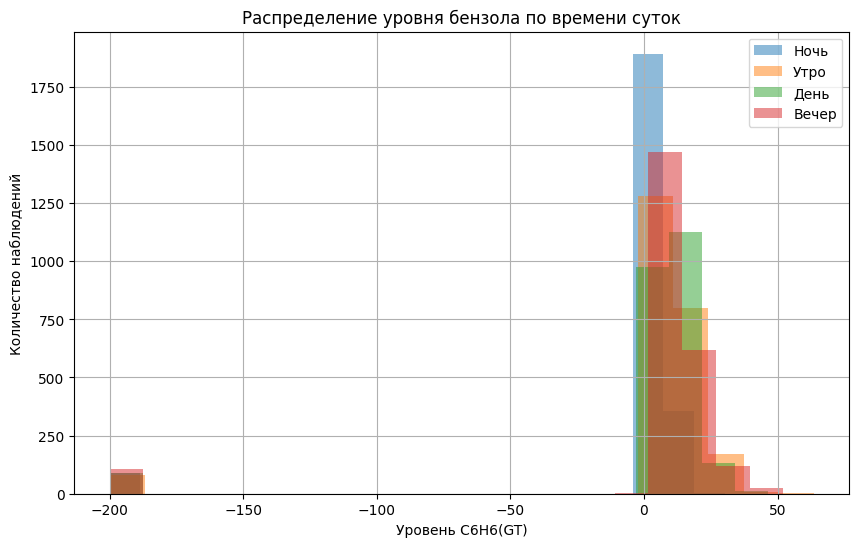

In [9]:
'''6. Аналогично изобразите гистограмму распределения уровня концентрации бензола (C6H6(GT))
относительно времени суток (можно выделить, например, утренние, дневные, вечерние и ночные
часы на основе признака "Время").'''
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.hour
df['Time_of_Day'] = pd.cut(df['Time'], bins=[0, 6, 12, 18, 24], labels=['Ночь', 'Утро', 'День', 'Вечер'], right=False)
plt.figure(figsize=(10, 6))
df['C6H6(GT)'].groupby(df['Time_of_Day']).hist(alpha=0.5, bins=20)
plt.title('Распределение уровня бензола по времени суток')
plt.xlabel('Уровень C6H6(GT)')
plt.ylabel('Количество наблюдений')
plt.legend(['Ночь', 'Утро', 'День', 'Вечер'])
plt.show()

<Figure size 1000x600 with 0 Axes>

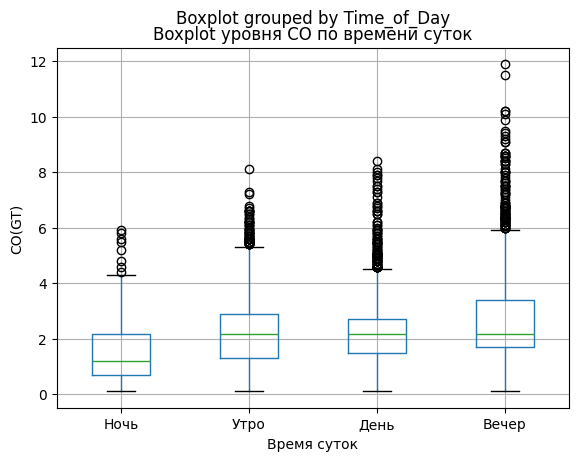

In [12]:
'''7. Постройте гистограммы или boxplots для CO(GT) , разбив данные по времени суток (утром,
днем, вечером, ночью).'''
plt.figure(figsize=(10, 6))
df.boxplot(column='CO(GT)', by='Time_of_Day')
plt.title('Boxplot уровня CO по времени суток')
plt.xlabel('Время суток')
plt.ylabel('CO(GT)')
plt.show()

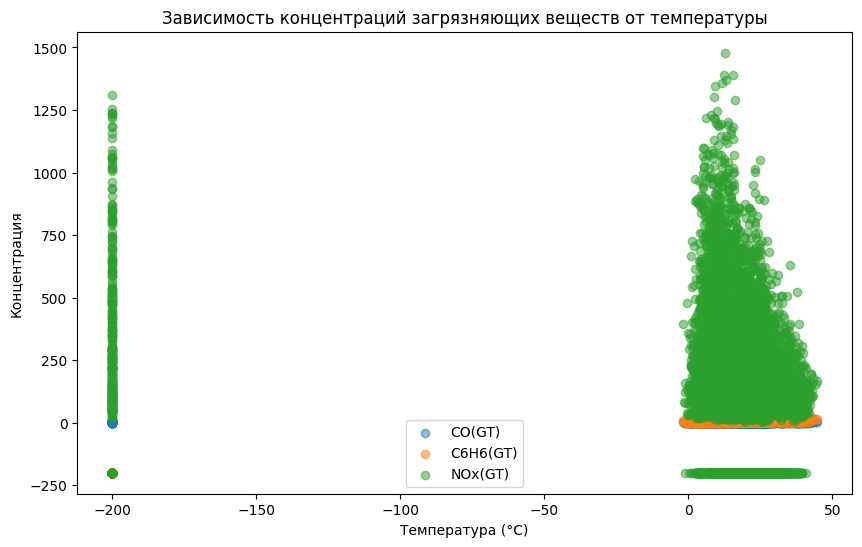

In [15]:
'''8. Постройте несколько гистограмм или диаграмм рассеяния, показывающих зависимость
концентраций разных загрязняющих веществ (например, CO(GT), C6H6(GT), NOx(GT)) от
температуры (T). Это поможет оценить, как температура влияет на различные типы загрязнения.'''
plt.figure(figsize=(10, 6))
plt.scatter(df['T'], df['CO(GT)'], label='CO(GT)', alpha=0.5)
plt.scatter(df['T'], df['C6H6(GT)'], label='C6H6(GT)', alpha=0.5)
plt.scatter(df['T'], df['NOx(GT)'], label='NOx(GT)', alpha=0.5)
plt.title('Зависимость концентраций загрязняющих веществ от температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Концентрация')
plt.legend()
plt.show()

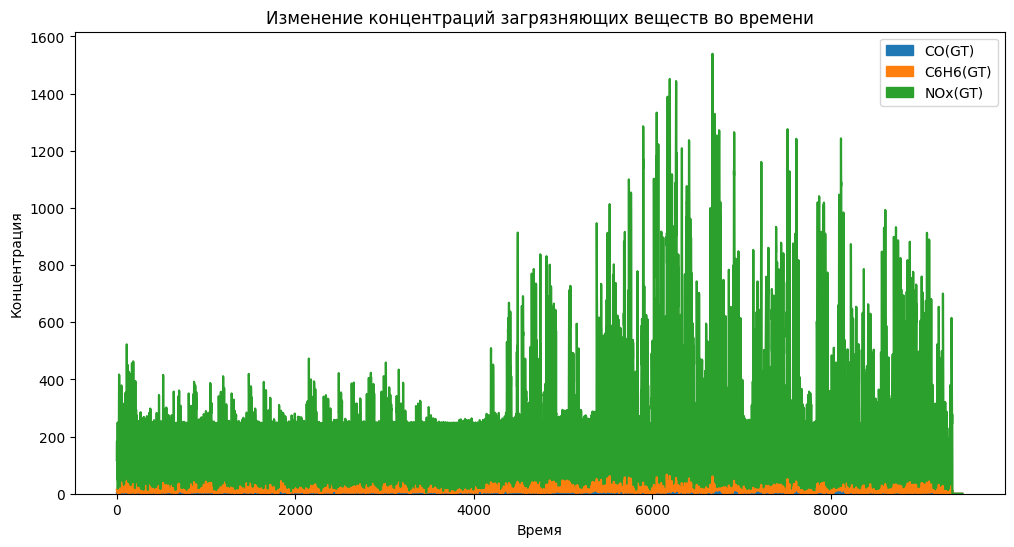

In [19]:
'''9*. Постройте график с областями (area plot), показывающий изменение во времени нескольких
показателей, например, концентрации разных веществ. Это позволит наглядно увидеть вклад
каждого вещества в общий уровень загрязнения'''

#Заменим значения -200 на среднее
mean_value_с6 = df['C6H6(GT)'][df['C6H6(GT)'] != -200].mean()
df.loc[df['C6H6(GT)'] == -200, 'C6H6(GT)'] = mean_value_с6
mean_value_nox = df['NOx(GT)'][df['NOx(GT)'] != -200].mean()
df.loc[df['NOx(GT)'] == -200, 'NOx(GT)'] = mean_value_nox

df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)']].plot.area(figsize=(12, 6))
plt.title('Изменение концентраций загрязняющих веществ во времени')
plt.xlabel('Время')
plt.ylabel('Концентрация')
plt.show()